<a href="https://colab.research.google.com/github/JeffChanSZ/SEPA---Group-16/blob/main/GoogleCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1qj0tZSWevifbTdS1_Vq-xscLXT9U1hTz' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')  

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("tweet_data.csv")

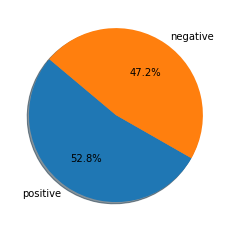

In [6]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

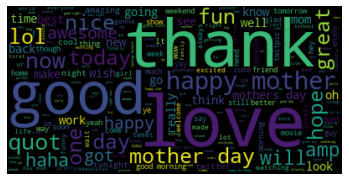

In [9]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

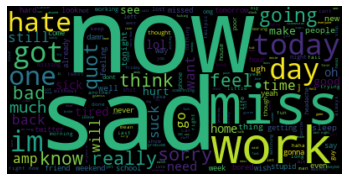

In [10]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()